In [341]:
# looking at this as classification problem
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm

In [342]:
# Read integrateddata
df =pd.read_parquet('integratedData.parquet.gz')

In [343]:
print(df.shape)
df.head()

(6826300, 20)


,date,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,fire_occurred,acres_burned,fire_name,longitude,latitude
0,1999-01-01,0.0,40.3,0.00589,138.0,123.0,1.6,293.1,281.1,24.0,16.0,15.5,34.0,1.7,0.74,False,NaN,None,-117.975000,33.566667
1,1999-01-01,0.0,39.8,0.00590,137.2,123.0,1.6,293.1,281.2,24.0,16.0,15.5,35.0,1.7,0.74,False,NaN,None,-117.933333,33.566667
2,1999-01-01,0.0,38.2,0.00580,137.2,123.0,1.7,293.2,281.2,26.0,15.2,14.9,37.0,1.7,0.77,False,NaN,None,-117.891667,33.566667
3,1999-01-01,0.0,36.4,0.00567,137.3,49.0,1.8,293.3,280.3,27.0,15.0,14.8,38.0,1.8,0.76,False,NaN,None,-117.850000,33.566667
4,1999-01-01,0.0,33.8,0.00538,137.3,49.0,1.9,293.2,279.9,29.0,13.3,13.6,43.0,1.9,0.80,False,NaN,None,-117.808333,33.566667


In [344]:
# Choose only the data with fire occured 
df['fire_occurred'].unique()

array([False,  True])

In [345]:
# There are 1743 fires occured in this integrated data as gridme represnted of rectangule polygon.
# historical perimeters consist of 176 first. will count on this integrated dataset first then will explor more
dff=df[df['fire_occurred']==True]
dff.head()
print(dff.shape)

(1743, 20)


In [346]:
dff.columns

Index(['date', 'precipitation_amount_mm', 'relative_humidity_%',
       'specific_humidity_kg/kg',
       'surface_downwelling_shortwave_flux_in_air_W m-2',
       'wind_from_direction_Degrees Clockwise from north', 'wind_speed_m/s',
       'max_air_temperature_K', 'min_air_temperature_K',
       'burning_index_g_Unitless', 'dead_fuel_moisture_100hr_Percent',
       'dead_fuel_moisture_1000hr_Percent',
       'energy_release_component-g_Unitless',
       'potential_evapotranspiration_mm', 'mean_vapor_pressure_deficit_kPa',
       'fire_occurred', 'acres_burned', 'fire_name', 'longitude', 'latitude'],
      dtype='object')

In [347]:
dff['month'] = dff.apply(lambda row: row.date.month, axis = 1)
dff['day']   = dff.apply(lambda row: row.date.day, axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [348]:
dff.head()

,date,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,...,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,fire_occurred,acres_burned,fire_name,longitude,latitude,month,day
1021229,2001-01-03,0.0,9.9,0.00191,147.2,37.0,4.4,297.0,281.2,68.0,...,72.0,4.8,1.73,True,10438.019531,VIEJAS,-116.766667,32.816667,1,3
1021230,2001-01-03,0.0,9.8,0.00195,145.1,54.0,4.9,295.2,280.8,76.0,...,77.0,4.8,1.56,True,10438.019531,VIEJAS,-116.725000,32.816667,1,3
1021231,2001-01-03,0.0,10.1,0.00180,142.9,54.0,5.4,294.1,279.8,83.0,...,81.0,4.9,1.46,True,10438.019531,VIEJAS,-116.683333,32.816667,1,3
1021275,2001-01-03,0.0,9.5,0.00209,149.7,37.0,3.7,298.7,280.4,54.0,...,61.0,4.6,1.82,True,10438.019531,VIEJAS,-116.850000,32.775000,1,3
1021276,2001-01-03,0.0,9.5,0.00199,149.3,37.0,3.9,297.7,280.3,58.0,...,65.0,4.5,1.75,True,10438.019531,VIEJAS,-116.808333,32.775000,1,3


In [349]:
# First feature selection for regression problem is using correlaiton between target (acres burned) and attribtues 
# corr by defautl use Pearson method 
# as per corr matrix, features with postive correlation are wind speed (make sense), burning index (make sense),
#dead_fuel_moisture_1000hr_Percent (make sense), mean_vapor_pressure_deficit_kPa (not sure).
# I would expect precipitation amount mm and temp to have impact as well
dff.corr()

,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,fire_occurred,acres_burned,longitude,latitude,month,day
precipitation_amount_mm,1.000000,0.169692,0.320085,0.129748,0.093861,0.020029,0.168891,0.186255,-0.508496,0.165336,-0.200008,-0.152787,0.068134,0.030384,NaN,-0.137186,0.162464,0.019143,-0.101182,-0.121096
relative_humidity_%,0.169692,1.000000,0.799997,0.265563,0.320790,-0.150883,-0.318231,0.144716,-0.478484,0.557094,-0.050905,-0.353273,-0.238368,-0.633242,NaN,-0.358009,-0.230164,0.254959,-0.427879,-0.103996
specific_humidity_kg/kg,0.320085,0.799997,1.000000,0.373596,0.377512,-0.282173,0.099876,0.368052,-0.503223,0.440097,-0.267088,-0.155670,-0.076531,-0.368611,NaN,-0.383731,0.038316,0.157809,-0.430667,-0.145785
surface_downwelling_shortwave_flux_in_air_W m-2,0.129748,0.265563,0.373596,1.000000,0.043895,0.045398,0.354042,0.430597,0.012361,0.115203,-0.255307,0.113470,0.626631,0.199035,NaN,-0.495827,0.198774,0.094001,-0.741751,-0.321733
wind_from_direction_Degrees Clockwise from north,0.093861,0.320790,0.377512,0.043895,1.000000,-0.471795,0.003035,-0.052204,-0.291181,-0.100832,-0.351410,0.200528,-0.340160,-0.195085,NaN,-0.272082,0.123125,0.040285,-0.209615,0.157960
wind_speed_m/s,0.020029,-0.150883,-0.282173,0.045398,-0.471795,1.000000,-0.327828,-0.312535,0.522786,0.308351,0.194265,-0.224856,0.593219,-0.154905,NaN,0.022032,0.071819,-0.137229,0.004632,-0.114431
max_air_temperature_K,0.168891,-0.318231,0.099876,0.354042,0.003035,-0.327828,1.000000,0.728432,-0.062297,-0.366895,-0.232154,0.322389,0.395900,0.868627,NaN,-0.037525,0.290471,-0.119002,-0.062514,-0.126614
min_air_temperature_K,0.186255,0.144716,0.368052,0.430597,-0.052204,-0.312535,0.728432,1.000000,-0.239558,-0.097575,-0.107268,0.070648,0.288135,0.582566,NaN,-0.226485,-0.057950,0.046056,-0.207849,-0.257347
burning_index_g_Unitless,-0.508496,-0.478484,-0.503223,0.012361,-0.291181,0.522786,-0.062297,-0.239558,1.000000,-0.365583,-0.209006,0.521278,0.485775,0.169362,NaN,0.125107,0.324019,-0.112840,0.063736,0.046030
dead_fuel_moisture_100hr_Percent,0.165336,0.557094,0.440097,0.115203,-0.100832,0.308351,-0.366895,-0.097575,-0.365583,1.000000,0.465242,-0.796580,0.024389,-0.541022,NaN,-0.179308,-0.328767,0.046369,-0.133079,-0.228894


In [350]:

#dfc=dff.drop(['date','longitude','latitude','fire_name', 'fire_occurred'], axis=1)
dfc=dff.drop(['date','fire_name', 'fire_occurred'], axis=1)
dfc.head()

,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,acres_burned,longitude,latitude,month,day
1021229,0.0,9.9,0.00191,147.2,37.0,4.4,297.0,281.2,68.0,6.9,9.5,72.0,4.8,1.73,10438.019531,-116.766667,32.816667,1,3
1021230,0.0,9.8,0.00195,145.1,54.0,4.9,295.2,280.8,76.0,6.3,8.6,77.0,4.8,1.56,10438.019531,-116.725000,32.816667,1,3
1021231,0.0,10.1,0.00180,142.9,54.0,5.4,294.1,279.8,83.0,5.9,7.9,81.0,4.9,1.46,10438.019531,-116.683333,32.816667,1,3
1021275,0.0,9.5,0.00209,149.7,37.0,3.7,298.7,280.4,54.0,9.3,11.3,61.0,4.6,1.82,10438.019531,-116.850000,32.775000,1,3
1021276,0.0,9.5,0.00199,149.3,37.0,3.9,297.7,280.3,58.0,8.4,10.6,65.0,4.5,1.75,10438.019531,-116.808333,32.775000,1,3


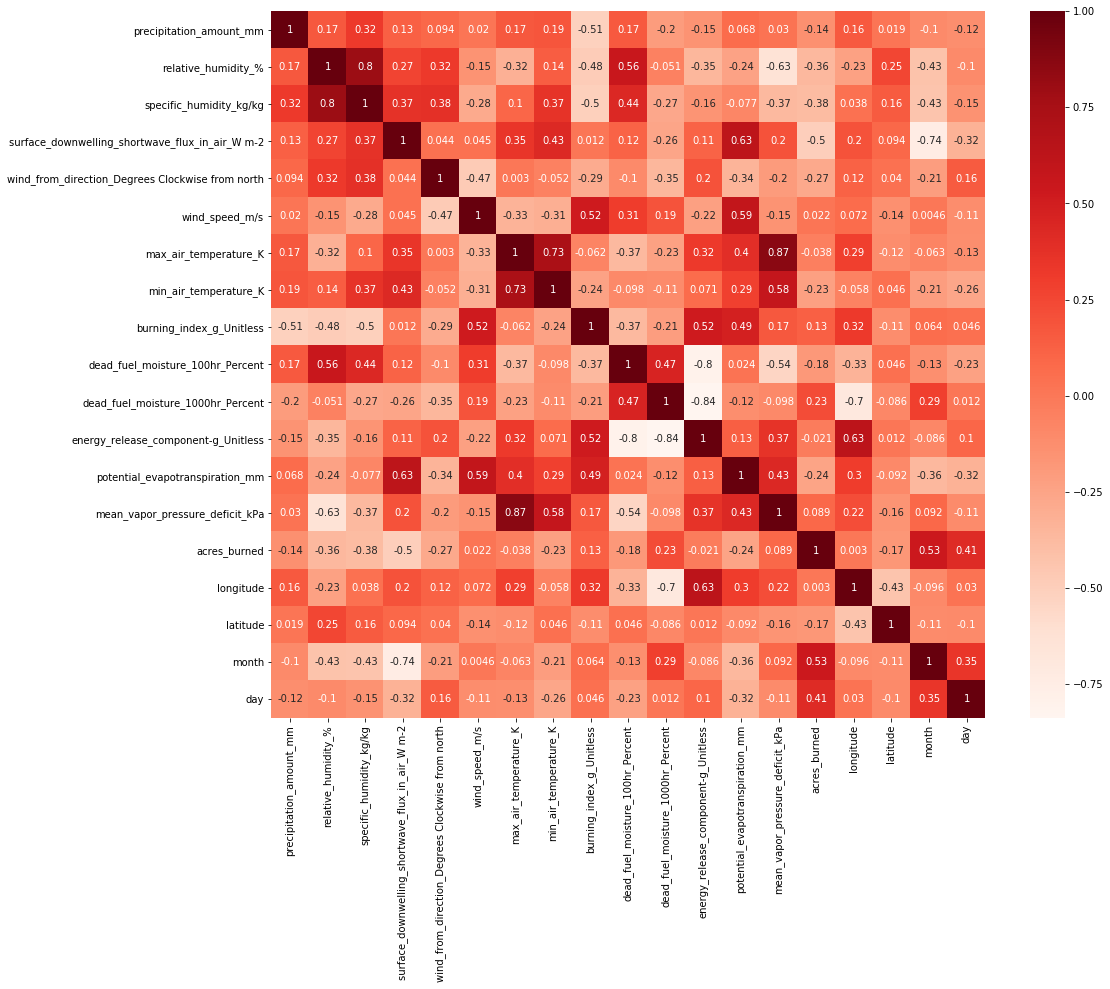

In [351]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,13))
cor = dfc.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [352]:
dfc.columns


Index(['precipitation_amount_mm', 'relative_humidity_%',
       'specific_humidity_kg/kg',
       'surface_downwelling_shortwave_flux_in_air_W m-2',
       'wind_from_direction_Degrees Clockwise from north', 'wind_speed_m/s',
       'max_air_temperature_K', 'min_air_temperature_K',
       'burning_index_g_Unitless', 'dead_fuel_moisture_100hr_Percent',
       'dead_fuel_moisture_1000hr_Percent',
       'energy_release_component-g_Unitless',
       'potential_evapotranspiration_mm', 'mean_vapor_pressure_deficit_kPa',
       'acres_burned', 'longitude', 'latitude', 'month', 'day'],
      dtype='object')

In [353]:
dfc.head()

,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,acres_burned,longitude,latitude,month,day
1021229,0.0,9.9,0.00191,147.2,37.0,4.4,297.0,281.2,68.0,6.9,9.5,72.0,4.8,1.73,10438.019531,-116.766667,32.816667,1,3
1021230,0.0,9.8,0.00195,145.1,54.0,4.9,295.2,280.8,76.0,6.3,8.6,77.0,4.8,1.56,10438.019531,-116.725000,32.816667,1,3
1021231,0.0,10.1,0.00180,142.9,54.0,5.4,294.1,279.8,83.0,5.9,7.9,81.0,4.9,1.46,10438.019531,-116.683333,32.816667,1,3
1021275,0.0,9.5,0.00209,149.7,37.0,3.7,298.7,280.4,54.0,9.3,11.3,61.0,4.6,1.82,10438.019531,-116.850000,32.775000,1,3
1021276,0.0,9.5,0.00199,149.3,37.0,3.9,297.7,280.3,58.0,8.4,10.6,65.0,4.5,1.75,10438.019531,-116.808333,32.775000,1,3


In [354]:
# # As mentioned early , there are a total of 1743 fires in the integrated data. We will get the acuracy performance based
# # on two apporaches: first: fitting the model over all data and second: fitting the model to four parts of data which might
# # lead to better model 
# dfm=dfl
# c0=dfm['acres_burned']>1058
# c1=dfm['acres_burned'] <=10438
# c2=dfm['acres_burned'] >10438
# c3 = dfm['acres_burned'] <=61691
# c4 =dfm['acres_burned'] > 61691
# c5=dfm['acres_burned'] <= 85468
# c6=dfm['acres_burned'] >85468
# c7=dfm['acres_burned'] <= 163000
# c8=dfm['acres_burned'] >163000
# dfm_1= dfm[c0 & c1]
# dfm_2=dfm[c2 & c3]
# dfm_3=dfm[c4 & c7]
# #dfm_4 =dfm[c6 & c7]
# dfm_4 =dfm[c8]


In [355]:
ff=dfc.columns.values
ff

array(['precipitation_amount_mm', 'relative_humidity_%',
       'specific_humidity_kg/kg',
       'surface_downwelling_shortwave_flux_in_air_W m-2',
       'wind_from_direction_Degrees Clockwise from north',
       'wind_speed_m/s', 'max_air_temperature_K', 'min_air_temperature_K',
       'burning_index_g_Unitless', 'dead_fuel_moisture_100hr_Percent',
       'dead_fuel_moisture_1000hr_Percent',
       'energy_release_component-g_Unitless',
       'potential_evapotranspiration_mm',
       'mean_vapor_pressure_deficit_kPa', 'acres_burned', 'longitude',
       'latitude', 'month', 'day'], dtype=object)

In [356]:
f =['precipitation_amount_mm', 'relative_humidity_%',
       'specific_humidity_kg/kg',
       'surface_downwelling_shortwave_flux_in_air_W m-2',
       'wind_from_direction_Degrees Clockwise from north',
       'wind_speed_m/s', 'max_air_temperature_K', 'min_air_temperature_K',
       'burning_index_g_Unitless', 'dead_fuel_moisture_100hr_Percent',
       'dead_fuel_moisture_1000hr_Percent',
       'energy_release_component-g_Unitless',
       'potential_evapotranspiration_mm',
       'mean_vapor_pressure_deficit_kPa', 'longitude',
       'latitude', 'month', 'day']

In [357]:
# As mentioned early , there are a total of 1743 fires in the integrated data.
# we divide  the data based on  acres burnedas a measure of high fire risk to small (1058 to 40000), medium (40000 to 100000) 
# and large fire ( above 100000)
dfm=dfc 
c0=dfm['acres_burned']>1058
c1=dfm['acres_burned'] <=40000
c2=dfm['acres_burned'] >40000
c3 = dfm['acres_burned'] <=100000
c4 =dfm['acres_burned'] > 100000
# c5=dfm['acres_burned'] <= 85468
# c6=dfm['acres_burned'] >85468
# c7=dfm['acres_burned'] <= 163000
# c8=dfm['acres_burned'] >163000
dfm1= dfm[c0 & c1]
dfm2=dfm[c2 & c3]
dfm3=dfm[c4]
#dfm_4 =dfm[c6 & c7]
#dfm_4 =dfm[c8]

In [358]:
print(dfm1.count()[1])
print(dfm2.count()[1])
print(dfm3.count()[1])

670
414
659


In [359]:
dfm1['label'] = 0
dfm2['label'] = 1
dfm3['label'] = 2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [360]:
dfmt=pd.concat([dfm1, dfm2,dfm3])
dfmt.head()

,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,acres_burned,longitude,latitude,month,day,label
1021229,0.0,9.9,0.00191,147.2,37.0,4.4,297.0,281.2,68.0,6.9,9.5,72.0,4.8,1.73,10438.019531,-116.766667,32.816667,1,3,0
1021230,0.0,9.8,0.00195,145.1,54.0,4.9,295.2,280.8,76.0,6.3,8.6,77.0,4.8,1.56,10438.019531,-116.725000,32.816667,1,3,0
1021231,0.0,10.1,0.00180,142.9,54.0,5.4,294.1,279.8,83.0,5.9,7.9,81.0,4.9,1.46,10438.019531,-116.683333,32.816667,1,3,0
1021275,0.0,9.5,0.00209,149.7,37.0,3.7,298.7,280.4,54.0,9.3,11.3,61.0,4.6,1.82,10438.019531,-116.850000,32.775000,1,3,0
1021276,0.0,9.5,0.00199,149.3,37.0,3.9,297.7,280.3,58.0,8.4,10.6,65.0,4.5,1.75,10438.019531,-116.808333,32.775000,1,3,0


In [361]:
target =dfmt['acres_burned']

In [362]:
y=dfmt['label'].values
y


array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [363]:
x=dfmt.drop(['label','acres_burned'], axis=1)



In [364]:
x=x[f]


In [365]:
x= x.values

In [366]:
encoded_Y =y

In [367]:
encoded_Y

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [368]:
# multi-class classification with Keras and sequential , it does not show any result
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
# # load dataset
# dataframe = pandas.read_csv("iris.data", header=None)
# dataset = dataframe.values
# X = dataset[:,0:4].astype(float)
# Y = dataset[:,4]
# # encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(Y)
# encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=4, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, x, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Error when checking input: expected dense_241_input to have shape (4,) but got array with shape (18,)

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Error when checking input: expected dense_243_input to have shape (4,) but got array with shape (18,)

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Error when checking input: expected dense_245_input to have shape (

Baseline: nan% (nan%)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Error when checking input: expected dense_257_input to have shape (4,) but got array with shape (18,)

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Error when checking input: expected dense_259_input to have shape (4,) but got array with shape (18,)

  FitFailedWarning)


In [369]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.naive_bayes import MultinomialNB
# X_train, X_test, y_train, y_test = train_test_split(x,y, random_state = 0)
# clf = MultinomialNB().fit(X_train, y_train)

In [370]:
features =x
labels =y

In [371]:
labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [372]:
# As alwasy randomforestregressor perfomrs better , tryig to get best parameter for randomforestclassfier 
# from sklearn.model_selection import train_test_split
# x_train1, x_valid1, y_train1, y_valid1 = train_test_split(x, y, test_size=0.3, random_state=50)
# from sklearn.metrics import mean_absolute_error
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score
# parameters = { 'max_depth' : [5,10,15,20,25],'min_samples_split':[2,6,8], 
#     'min_samples_leaf':[1,7,9,13],'random_state' : [5,20,25,30,35,40] }
# clf1 = RandomForestClassifier(criterion='gini')
# CV_rfc1 = GridSearchCV(clf1 , parameters,scoring= 'accuracy', cv=30)
# CV_rfc1.fit(x_train1, y_train1)
# # y_pred = clf.predict(X_test)

# # clf1.fit(x_train1, y_train1)
# y_pred1=CV_rfc1.predict(x_valid1)
# #accuracy = np.sum(y_pred == y_test)/len(y_test)
# #accuracy = accuracy_score(y_pred1, y_valid1)
# vaild_acc = mean_absolute_error(y_valid1, y_pred1)
# #print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
# print ('Valid accuracy = ' + str(vaild_acc)) 
# print (CV_rfc1.best_params_)

KeyboardInterrupt: 

In [373]:
np.unique(y)

array([0, 1, 2], dtype=int64)

In [374]:
features=x
labels =y

In [375]:
np.unique(y)

array([0, 1, 2], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

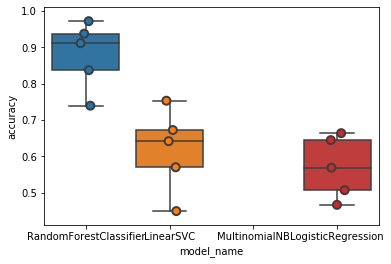

In [376]:
# comparison with dfferent classfiers for accuracy and confusion matrix 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=20, random_state=5, min_samples_split = 2,  min_samples_leaf=1 ),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [377]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.617436
LogisticRegression        0.570334
MultinomialNB                  NaN
RandomForestClassifier    0.879016
Name: accuracy, dtype: float64

In [378]:
np.unique(y)

array([0, 1, 2], dtype=int64)

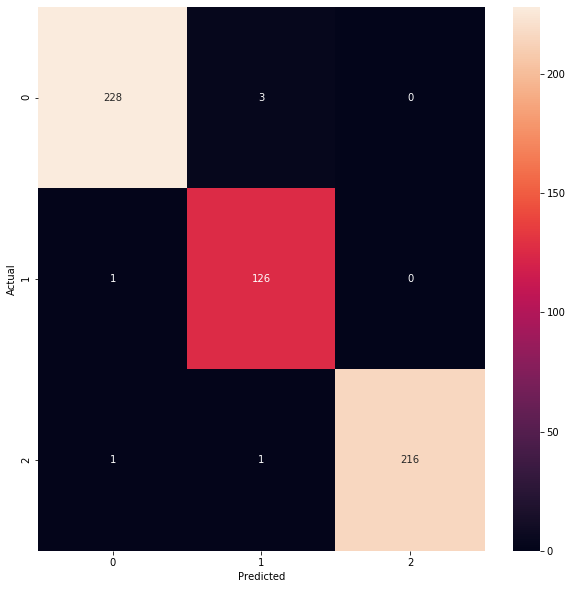

In [380]:
model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=5, min_samples_split = 2,  min_samples_leaf=1 )
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, dfmt.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [381]:

from IPython.display import display
for predicted in np.unique(y):
  for actual in np.unique(y):
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(y[actual], y[predicted], conf_mat[actual, predicted]))
      display(dfmt.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['label', 'acres_burned']])
      print('')


In [382]:
dfmt.head()

,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,acres_burned,longitude,latitude,month,day,label
1021229,0.0,9.9,0.00191,147.2,37.0,4.4,297.0,281.2,68.0,6.9,9.5,72.0,4.8,1.73,10438.019531,-116.766667,32.816667,1,3,0
1021230,0.0,9.8,0.00195,145.1,54.0,4.9,295.2,280.8,76.0,6.3,8.6,77.0,4.8,1.56,10438.019531,-116.725000,32.816667,1,3,0
1021231,0.0,10.1,0.00180,142.9,54.0,5.4,294.1,279.8,83.0,5.9,7.9,81.0,4.9,1.46,10438.019531,-116.683333,32.816667,1,3,0
1021275,0.0,9.5,0.00209,149.7,37.0,3.7,298.7,280.4,54.0,9.3,11.3,61.0,4.6,1.82,10438.019531,-116.850000,32.775000,1,3,0
1021276,0.0,9.5,0.00199,149.3,37.0,3.9,297.7,280.3,58.0,8.4,10.6,65.0,4.5,1.75,10438.019531,-116.808333,32.775000,1,3,0


In [383]:
# This time, we try binary classfication small and large fires 

c00=dfm['acres_burned']>1058
# c1=dfm['acres_burned'] <=40000
# c2=dfm['acres_burned'] >40000
c3 = dfm['acres_burned'] <=65000
c4 =dfm['acres_burned'] > 65000
# c5=dfm['acres_burned'] <= 85468
# c6=dfm['acres_burned'] >85468
# c7=dfm['acres_burned'] <= 163000
# c8=dfm['acres_burned'] >163000
dfm11= dfm[c0 & c3]
#dfm2=dfm[c2 & c3]
dfm33=dfm[c4]
#dfm_4 =dfm[c6 & c7]
#dfm_4 =dfm[c8]

In [384]:
print(dfm11.shape[0])
print(dfm33.shape[0])

895
848


In [385]:
dfm11['label']= 0
dfm33['label']=1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [386]:
dfmtt=pd.concat([dfm11, dfm33])
dfmtt.head()

,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,acres_burned,longitude,latitude,month,day,label
1021229,0.0,9.9,0.00191,147.2,37.0,4.4,297.0,281.2,68.0,6.9,9.5,72.0,4.8,1.73,10438.019531,-116.766667,32.816667,1,3,0
1021230,0.0,9.8,0.00195,145.1,54.0,4.9,295.2,280.8,76.0,6.3,8.6,77.0,4.8,1.56,10438.019531,-116.725000,32.816667,1,3,0
1021231,0.0,10.1,0.00180,142.9,54.0,5.4,294.1,279.8,83.0,5.9,7.9,81.0,4.9,1.46,10438.019531,-116.683333,32.816667,1,3,0
1021275,0.0,9.5,0.00209,149.7,37.0,3.7,298.7,280.4,54.0,9.3,11.3,61.0,4.6,1.82,10438.019531,-116.850000,32.775000,1,3,0
1021276,0.0,9.5,0.00199,149.3,37.0,3.9,297.7,280.3,58.0,8.4,10.6,65.0,4.5,1.75,10438.019531,-116.808333,32.775000,1,3,0


In [387]:
x=dfmtt.drop(['label','acres_burned'], axis=1)
#x=x[f]
x= x.values

y=dfmtt['label'].values
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [388]:
# Get new labels for two classificaiton ( 0 & 1)
encoded_Y=y
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
# # load dataset
# dataframe = pandas.read_csv("iris.data", header=None)
# dataset = dataframe.values
# X = dataset[:,0:4].astype(float)
# Y = dataset[:,4]
# # encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(Y)
# encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=4, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, x, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Error when checking input: expected dense_261_input to have shape (4,) but got array with shape (18,)

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Error when checking input: expected dense_263_input to have shape (4,) but got array with shape (18,)

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Error when checking input: expected dense_265_input to have shape (

Baseline: nan% (nan%)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Error when checking input: expected dense_277_input to have shape (4,) but got array with shape (18,)

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Error when checking input: expected dense_279_input to have shape (4,) but got array with shape (18,)

  FitFailedWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

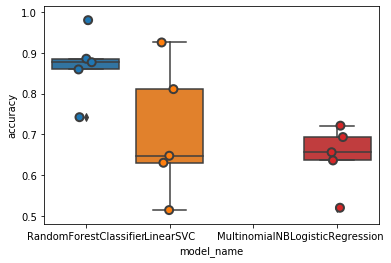

model_name
LinearSVC                 0.705696
LogisticRegression        0.645411
MultinomialNB                  NaN
RandomForestClassifier    0.868676
Name: accuracy, dtype: float64

In [389]:
# Try and check mulitple classifier 
features =x
labels=y

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
features =x
labels =y

from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=20, random_state=5, min_samples_split = 2,  min_samples_leaf=1 ),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

cv_df.groupby('model_name').accuracy.mean()

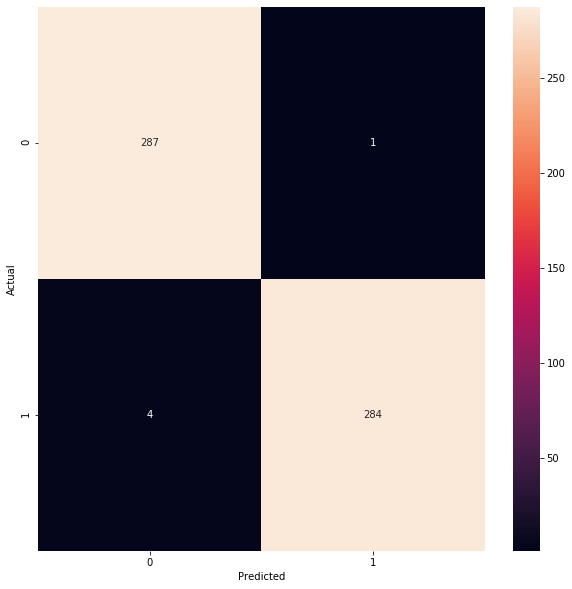

In [390]:
model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=5, min_samples_split = 2,  min_samples_leaf=1 )
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, dfmt.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

dfm11.shape[0